# Calculating Extreme Heat days using daily projections from Cal-Adapt API

#### Step 1. Download data

In [2]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

----
## Step 1. Download data
----

### 1a. Defining your area of interest

The `g` geometry parameter is used to download data for a point, line or polygon. Geometry can be written in various formats including WKT, GeoJSON, KML. The examples below use WKT (Well Known Text) format.

#### To get data for a grid cell ...

In [3]:
city = 'San Joaquin Valley'
#point = 'POINT(-121.4687 38.5938)' # Sacramento
point = 'POINT(-120.1106 36.3744)'  # San Joaquin Valley

In [4]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Name of boundary layer in API (Census Tracts)
resource = 'locagrid'

#Get ID
url = api + '/' + resource + '/?intersects=' +  point

response = requests.get(url)
county = response.json()
county = county['features'][0]
id  = county['id']
#location = 'Census Tract ID ' + str(county['properties']['tract'])
print ("ID is", id)
#print("location is", location)

ID is 43186


### 1b. Download observed daily tasmax

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are degrees Celsius and projected data are in Kelvin.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given an ID
    - return a new Pandas dataframe that contains all the data

In [5]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'
# Request header
headers = {'ContentType': 'json'}

def process_daily_data(slug):
    # Make request
    url = api + '/series/' + slug + '/events/?ref=/api/' + resource + '/%s/&imperial=TRUE&stat=mean' % id
    response = requests.get(url)
    #print(response)
    # Get data
    if response.ok:
        data = response.json()
        df = pd.DataFrame(data)
        df.set_index('index', inplace = True)
        df.index = pd.to_datetime(df.index)
    else:
        print('Failed to download:')
    return df

In [6]:
def get_observed():
    # Create slug
    slug = 'tasmax_day_livneh'
    df = process_daily_data(slug)
    return df

In [7]:
observedDF = get_observed()
observedDF

,name,data
index,,
1950-01-01 00:00:00+00:00,tasmax_day_livneh,46.872498
1950-01-02 00:00:00+00:00,tasmax_day_livneh,46.359501
1950-01-03 00:00:00+00:00,tasmax_day_livneh,42.215000
1950-01-04 00:00:00+00:00,tasmax_day_livneh,42.781998
1950-01-05 00:00:00+00:00,tasmax_day_livneh,48.222504
1950-01-06 00:00:00+00:00,tasmax_day_livneh,53.181499
1950-01-07 00:00:00+00:00,tasmax_day_livneh,54.468498
1950-01-08 00:00:00+00:00,tasmax_day_livneh,53.392998
1950-01-09 00:00:00+00:00,tasmax_day_livneh,53.415497


### 1c. Download projected daily tasmax

The projected daily timeseries are form 2006 - 2099/2100 and units are in degrees Kelvin. You can easily modify the code to add/subtract models, scenarios, climate variables

In [8]:
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['tasmax']
    period = ['day']
    models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5', 'ACCESS1-0', 'CCSM4', 'CESM1-BGC', 'CMCC-CMS', 'GFDL-CM3', 'HadGEM2-CC']
    #models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5']
    #scenarios = ['rcp45', 'rcp85', 'historical]
    scenarios = ['historical', 'rcp85', ]
    zipped = itertools.product(climvar, period, models, scenarios)
    
    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

In [9]:
df = get_projections()
df

,name,data
index,,
1950-01-01 00:00:00+00:00,tasmax_day_CanESM2_historical,62.818573
1950-01-02 00:00:00+00:00,tasmax_day_CanESM2_historical,62.514801
1950-01-03 00:00:00+00:00,tasmax_day_CanESM2_historical,59.902527
1950-01-04 00:00:00+00:00,tasmax_day_CanESM2_historical,48.215927
1950-01-05 00:00:00+00:00,tasmax_day_CanESM2_historical,47.420357
1950-01-06 00:00:00+00:00,tasmax_day_CanESM2_historical,51.144608
1950-01-07 00:00:00+00:00,tasmax_day_CanESM2_historical,54.972412
1950-01-08 00:00:00+00:00,tasmax_day_CanESM2_historical,58.808891
1950-01-09 00:00:00+00:00,tasmax_day_CanESM2_historical,53.652351


In [10]:
# Keep only required parameters in slug
df['Climate Data'] = df['name'].str.split('_', expand=True)[2] 
df.index.name = 'Date'
df.drop(columns= 'name', inplace = True)
df.head()

,data,Climate Data
Date,,
1950-01-01 00:00:00+00:00,62.818573,CanESM2
1950-01-02 00:00:00+00:00,62.514801,CanESM2
1950-01-03 00:00:00+00:00,59.902527,CanESM2
1950-01-04 00:00:00+00:00,48.215927,CanESM2
1950-01-05 00:00:00+00:00,47.420357,CanESM2


In [11]:
df = df.pivot_table( values = 'data', index = 'Date', columns = 'Climate Data')

In [12]:
df_four_models = df

In [13]:
df.tail()

Climate Data,ACCESS1-0,CCSM4,CESM1-BGC,CMCC-CMS,CNRM-CM5,CanESM2,GFDL-CM3,HadGEM2-CC,HadGEM2-ES,MIROC5
Date,,,,,,,,,,
2100-12-27 00:00:00+00:00,63.561413,58.815979,65.025452,62.858070,67.986923,68.981796,57.075359,66.705811,NaN,NaN
2100-12-28 00:00:00+00:00,67.608231,58.578232,68.998161,61.250603,65.522858,70.731033,62.306610,58.597458,NaN,NaN
2100-12-29 00:00:00+00:00,69.177460,59.381775,70.529930,59.963665,68.131775,70.941643,60.319622,63.787842,NaN,NaN
2100-12-30 00:00:00+00:00,60.099129,62.882790,68.717735,62.115776,75.669495,62.027115,64.980621,65.771805,NaN,NaN
2100-12-31 00:00:00+00:00,58.933754,61.038292,61.637650,63.006271,69.535721,59.304047,71.382416,66.641266,NaN,NaN


In [14]:
month = 'July'
df = df[df.index.month == 7]

In [15]:
historical = df.loc['1961-01-01':'1990-12-31']
proj = df.loc['2021-01-01':'2050-12-31']

In [16]:
pd.Series(df.values.ravel('F')).head()

0    105.349121
1    106.833755
2    108.378105
3    106.910553
4    104.838913
dtype: float64

In [17]:
# Stack all 4 GCM's into one
stacked_hist = pd.Series(historical.values.ravel('F'))
stacked_proj = pd.Series(proj.values.ravel('F'))

In [18]:
stacked_hist.head(10)

0    109.382912
1    105.698097
2    104.613312
3     99.756531
4    100.479591
5     99.425453
6     95.003296
7     93.525574
8     90.608818
9     90.324493
dtype: float64

In [19]:
stacked_hist.min()

73.5931930542

In [20]:
my_min = min(stacked_hist.min(), stacked_proj.min())
my_max = max(stacked_hist.max(), stacked_proj.max())

In [21]:
my_max

118.6984939575

In [22]:
stacked_hist.describe()

count    9300.000000
mean       97.632808
std         6.019761
min        73.593193
25%        93.582182
50%        98.338276
75%       102.198500
max       113.621552
dtype: float64

In [23]:
stacked_proj.describe()

count    9300.000000
mean      101.549653
std         6.094240
min        77.528168
25%        97.586399
50%       102.022209
75%       106.158535
max       118.698494
dtype: float64

In [24]:
len(stacked_hist)

9300

In [25]:
directory = r'C:\Users\lkaur\Work summer 2019\tasmax_San_Joquan_avg.csv'
excel_file = df.to_csv(directory, header=True) 

In [26]:
# Create bins and labels for the data
import math
new_min = math.floor(my_min*2) #Times 2 beacuse we are goign to divide in for loop below
new_max = math.ceil(my_max*2)
bins = []
labels = []
# To get range from 73 to 120 with 0.5 interval
for i in range(new_min, new_max+1, 1):
    bins.append(i/2)
    labels.append(i/2 + 0.5)
del labels[-1]

In [27]:
len(bins)

92

In [28]:
len(labels)

91

In [29]:
#labels = bins
hist_binned = pd.cut(stacked_hist, bins, labels = labels)
#hist_binned = pd.cut(historical['avg'], len(bins))
proj_binned = pd.cut(stacked_proj, bins, labels = labels)

In [30]:
print(hist_binned.head(10))
print(proj_binned.head())

0    109.5
1    106.0
2    105.0
3    100.0
4    100.5
5     99.5
6     95.5
7     94.0
8     91.0
9     90.5
dtype: category
Categories (91, float64): [74.0 < 74.5 < 75.0 < 75.5 ... 117.5 < 118.0 < 118.5 < 119.0]
0    101.5
1    103.5
2    105.5
3    106.0
4    107.0
dtype: category
Categories (91, float64): [74.0 < 74.5 < 75.0 < 75.5 ... 117.5 < 118.0 < 118.5 < 119.0]


In [31]:
# Find frequency of each bin #1 Count the total number when each bin occurs. #2 Divide it by total data points #3 mulitply by 100
hist_freq = (hist_binned.groupby(hist_binned).count())/(hist_binned.size)*100
proj_freq = (proj_binned.groupby(proj_binned).count())/(proj_binned.size)*100
#grouped = s.groupby(s)

In [32]:
hist_freq.head(3)

74.0    0.032258
74.5    0.032258
75.0    0.010753
dtype: float64

In [33]:
proj_freq.head(3)

74.0    0.0
74.5    0.0
75.0    0.0
dtype: float64

In [34]:
# Add the previous frequencies to get total cummulative frequency
hist_cumm = hist_freq.cumsum()
proj_cumm = proj_freq.cumsum()

In [35]:
hist_cumm.head(10)

74.0    0.032258
74.5    0.064516
75.0    0.075269
75.5    0.096774
76.0    0.118280
76.5    0.150538
77.0    0.215054
77.5    0.290323
78.0    0.322581
78.5    0.365591
dtype: float64

In [36]:
proj_cumm.tail()

117.0     99.956989
117.5     99.967742
118.0     99.967742
118.5     99.989247
119.0    100.000000
dtype: float64

bins = []
for i in range(60):
    bins.append(i)

In [37]:
cumm = pd.DataFrame(
    {'Bin': labels,
     'Proj_Cumm%': proj_cumm,
     'Hist_Cumm%': hist_cumm
    })

In [38]:
cumm.head()

,Bin,Proj_Cumm%,Hist_Cumm%
74.0,74.0,0.0,0.032258
74.5,74.5,0.0,0.064516
75.0,75.0,0.0,0.075269
75.5,75.5,0.0,0.096774
76.0,76.0,0.0,0.118280


In [39]:
s = pd.Series(range(5))
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [40]:
proj_values = cumm['Proj_Cumm%'].values
hist_values = cumm['Hist_Cumm%'].values

In [41]:
hist_values = np.where(np.isclose(hist_values, 0), np.nan, hist_values)
proj_values = np.where(np.isclose(proj_values, 0), np.nan, proj_values)

In [42]:
hist_values = np.where(np.isclose(hist_values, 100), np.nan, hist_values)
proj_values = np.where(np.isclose(proj_values, 100), np.nan, proj_values)

In [43]:
cumm_drop_duplicates = pd.DataFrame(
    {'Bin': labels,
     'Hist_Cumm%': hist_values,
     'Proj_Cumm%': proj_values
    })

In [44]:
cumm_drop_duplicates.head(10)

,Bin,Hist_Cumm%,Proj_Cumm%
0,74.0,0.032258,NaN
1,74.5,0.064516,NaN
2,75.0,0.075269,NaN
3,75.5,0.096774,NaN
4,76.0,0.118280,NaN
5,76.5,0.150538,NaN
6,77.0,0.215054,NaN
7,77.5,0.290323,NaN
8,78.0,0.322581,0.021505
9,78.5,0.365591,0.032258


arr = np.where(np.isclose(x.values, [100]), np.nan, x.values)
x = pd.DataFrame(arr, index=x.index, columns=x.columns)

In [45]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [10, 10]

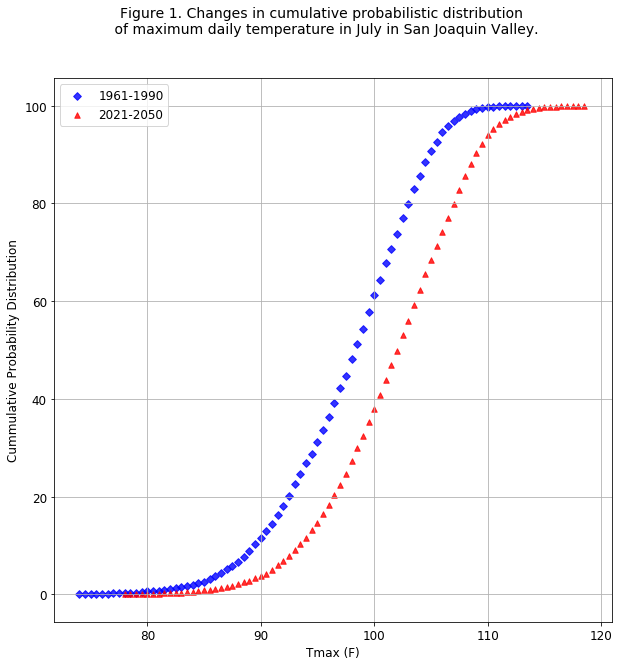

In [46]:
ax = cumm_drop_duplicates.plot(kind="scatter", x= "Bin" ,y="Hist_Cumm%", color="b", marker='D', label="1961-1990", alpha = 0.8, s= 30)
cumm_drop_duplicates.plot(kind="scatter", x= "Bin" ,y="Proj_Cumm%", color="r", marker='^', label ="2021-2050", ax=ax, alpha = 0.8, s= 30)
plt.grid(True)
#ax.title('Livermore Speeds to Altamont Wind Prodution', weight = 'bold', fontsize = 13)
ax.set_xlabel("Tmax (F)")
ax.set_ylabel("Cummulative Probability Distribution")
plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)
plt.show()

In [47]:
cumm_drop_duplicates.head()

,Bin,Hist_Cumm%,Proj_Cumm%
0,74.0,0.032258,NaN
1,74.5,0.064516,NaN
2,75.0,0.075269,NaN
3,75.5,0.096774,NaN
4,76.0,0.118280,NaN


In [48]:
sample_data = cumm_drop_duplicates.iloc[0:30, :]

In [49]:
sample_data.head(10)

,Bin,Hist_Cumm%,Proj_Cumm%
0,74.0,0.032258,NaN
1,74.5,0.064516,NaN
2,75.0,0.075269,NaN
3,75.5,0.096774,NaN
4,76.0,0.118280,NaN
5,76.5,0.150538,NaN
6,77.0,0.215054,NaN
7,77.5,0.290323,NaN
8,78.0,0.322581,0.021505
9,78.5,0.365591,0.032258


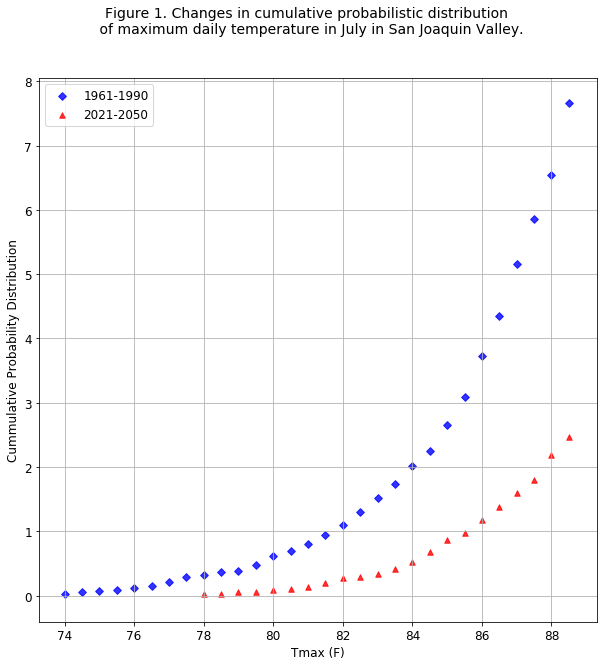

In [50]:
ax = sample_data.plot(kind="scatter", x= "Bin" ,y="Hist_Cumm%", color="b", marker='D', label="1961-1990", alpha = 0.8, s= 30)
sample_data.plot(kind="scatter", x= "Bin" ,y="Proj_Cumm%", color="r", marker='^', label ="2021-2050", ax=ax, alpha = 0.8, s= 30)
plt.grid(True)
#ax.title('Livermore Speeds to Altamont Wind Prodution', weight = 'bold', fontsize = 13)
ax.set_xlabel("Tmax (F)")
ax.set_ylabel("Cummulative Probability Distribution")
plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)
plt.show()

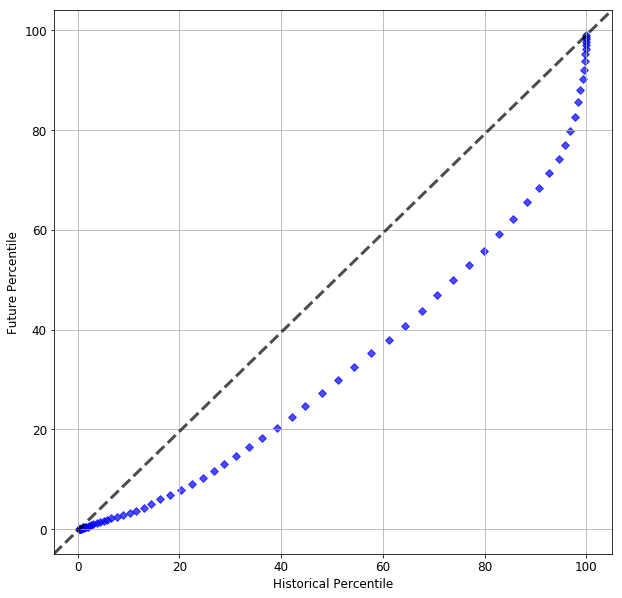

In [51]:
ax = cumm_drop_duplicates.plot(kind="scatter", x ="Hist_Cumm%",  y= 'Proj_Cumm%', color="b", marker='D' , alpha = 0.7, s= 30)
#df.plot(kind="scatter", x= "Hist_Cumm%" ,y="Hist_Cumm%", color="r", marker='^', label ="2021-2050", ax=ax, alpha = 0.8, s= 30)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'black', alpha = 0.7, ls = 'dashed')
plt.grid(True)
ax.set_xlabel("Historical Percentile")
ax.set_ylabel("Future Percentile")
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()
#plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)


In [52]:
hist_proj = pd.DataFrame(
    {
     'stacked_hist': stacked_hist,
     'stacked_proj': stacked_proj
    })

In [53]:
hist_proj = hist_proj.apply(lambda x: x.sort_values().values)

In [54]:
hist_proj.head()

,stacked_hist,stacked_proj
0,73.593193,77.528168
1,73.623566,77.657860
2,73.650269,78.073471
3,74.132736,78.543243
4,74.436234,78.850266


In [55]:
directory = r'C:\Users\lkaur\Work summer 2019\hist_proj_tasmax_San_Joquan_avg.csv'
excel_file = hist_proj.to_csv(directory, header=True) 

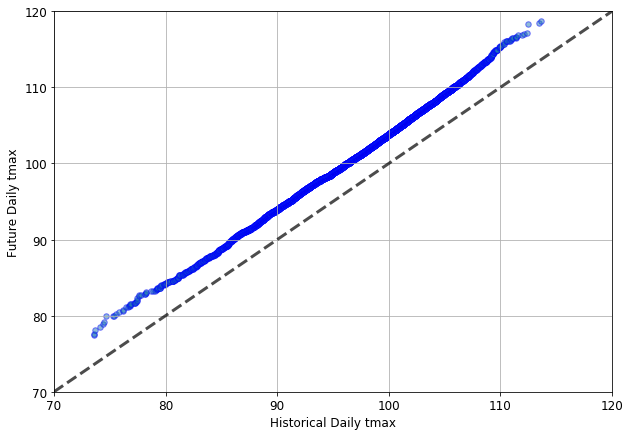

In [56]:
ax = hist_proj.plot(kind="scatter", x ="stacked_hist",  y= 'stacked_proj',  marker='o',  alpha = 0.5, s= 30, facecolors='none', edgecolors='b')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'black', alpha = 0.7, ls = 'dashed')
plt.grid(True)
ax.set_xlabel("Historical Daily tmax")
ax.set_ylabel("Future Daily tmax")
plt.ylim(70, 120)
plt.xlim(70,120)
#plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)
plt.show()

### Changes in One-in-Ten Max Daily Temp for 30 years 

In [57]:
df.head()

Climate Data,ACCESS1-0,CCSM4,CESM1-BGC,CMCC-CMS,CNRM-CM5,CanESM2,GFDL-CM3,HadGEM2-CC,HadGEM2-ES,MIROC5
Date,,,,,,,,,,
1950-07-01 00:00:00+00:00,105.349121,95.729820,87.535172,97.148926,99.740761,92.576248,103.403442,98.060738,99.802948,102.173683
1950-07-02 00:00:00+00:00,106.833755,92.902328,88.478180,95.328873,92.123886,94.166740,100.109848,99.504944,101.084938,100.664276
1950-07-03 00:00:00+00:00,108.378105,90.505547,87.721832,92.013969,87.621750,97.541023,98.752762,97.464394,99.012207,98.184769
1950-07-04 00:00:00+00:00,106.910553,94.293961,87.599548,86.340355,85.553024,91.108582,102.557274,101.149818,101.510223,102.441536
1950-07-05 00:00:00+00:00,104.838913,100.307655,86.205772,79.630844,87.451401,83.988678,101.641563,105.258041,98.721565,99.546577


In [58]:
thirtyYearRolling_OneInTen = df_four_models.rolling(30*365).quantile(.90, interpolation='higher')

In [59]:
thirtyYearRolling_OneInTen.tail()

Climate Data,ACCESS1-0,CCSM4,CESM1-BGC,CMCC-CMS,CNRM-CM5,CanESM2,GFDL-CM3,HadGEM2-CC,HadGEM2-ES,MIROC5
Date,,,,,,,,,,
2100-12-27 00:00:00+00:00,107.903114,106.924118,107.115669,107.948761,106.396172,109.979256,111.389511,109.490143,NaN,NaN
2100-12-28 00:00:00+00:00,107.903114,106.924118,107.115669,107.948761,106.396172,109.979256,111.389511,109.490143,NaN,NaN
2100-12-29 00:00:00+00:00,107.903114,106.924118,107.115669,107.948761,106.396172,109.979256,111.389511,109.490143,NaN,NaN
2100-12-30 00:00:00+00:00,107.903114,106.924118,107.115669,107.948761,106.396172,109.979256,111.389511,109.490143,NaN,NaN
2100-12-31 00:00:00+00:00,107.903114,106.924118,107.115669,107.948761,106.396172,109.979256,111.389511,109.490143,NaN,NaN


In [60]:
average = thirtyYearRolling_OneInTen.mean(axis = 1)

In [61]:
plt.rcParams.update({'font.size': 12})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


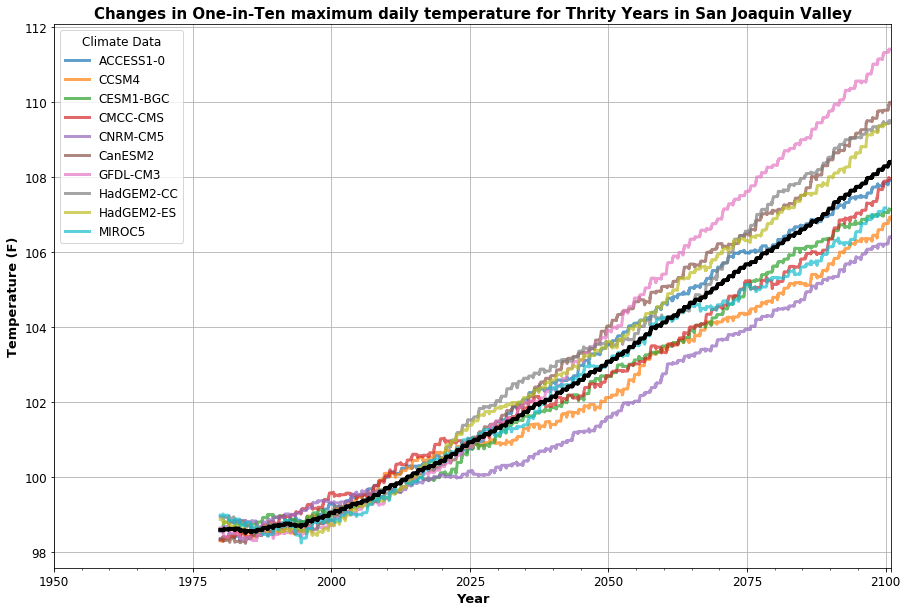

In [62]:
plt.rcParams['figure.figsize'] = [15, 10]
ax = thirtyYearRolling_OneInTen.plot(alpha = 0.7)
average.plot(color = 'black',  linewidth=4, ax = ax, label = "Average of 10 GCMs")
ax.set_xlabel("Year", fontsize = 13, weight= 'bold')
ax.set_ylabel("Temperature (F)", fontsize = 13, weight = 'bold')
plt.title("Changes in One-in-Ten maximum daily temperature for Thrity Years in " + city, fontsize = 15, weight = 'bold')

#plt.style.use('seaborn-whitegrid')
plt.grid(True)

plt.show()